In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
path = '/content/gdrive/My Drive/WINE/'

In [ ]:
os.listdir(path)

['wine.zip', 'WineQT.csv']

In [ ]:
# # importing the zipfile module
# from zipfile import ZipFile

# # loading the temp.zip and creating a zip object
# with ZipFile(path + 'wine.zip', 'r') as zObject:

# 	# Extracting all the members of the zip
# 	# into a specific location.
# 	zObject.extractall(path = path)


In [ ]:
os.listdir(path)

['wine.zip', 'WineQT.csv']

In [ ]:
df_train = pd.read_csv(path + 'WineQT.csv')

In [ ]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df_train.shape

(1143, 13)

In [ ]:
df_train.dtypes.value_counts()

float64    11
int64       2
dtype: int64

In [ ]:
df_train.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

In [ ]:
df_train.drop('Id' , axis = 1 , inplace = True)

In [ ]:
df_train.shape

(1143, 12)

In [ ]:
df_train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

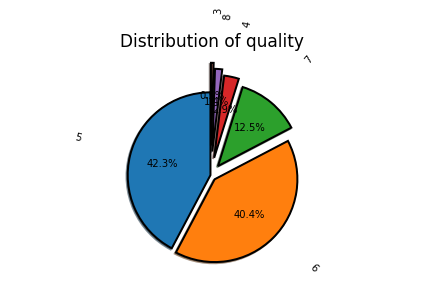

In [ ]:
# Pie chart
labels = df_train['quality'].unique().tolist()
sizes = df_train['quality'].value_counts().tolist()
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1 , 0.2 , 0.3 , 0.4 , 0.5)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 , wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True},radius = 1.4 , labeldistance = 1.6 , counterclock = True , center=(2, 3),
        rotatelabels=True , pctdistance = 0.6)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
# plt.title('Distribution of building class')
plt.title('Distribution of quality', fontdict={'fontsize': 17})
plt.show()

In [ ]:
df_train.drop('quality' , axis = 1).corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421


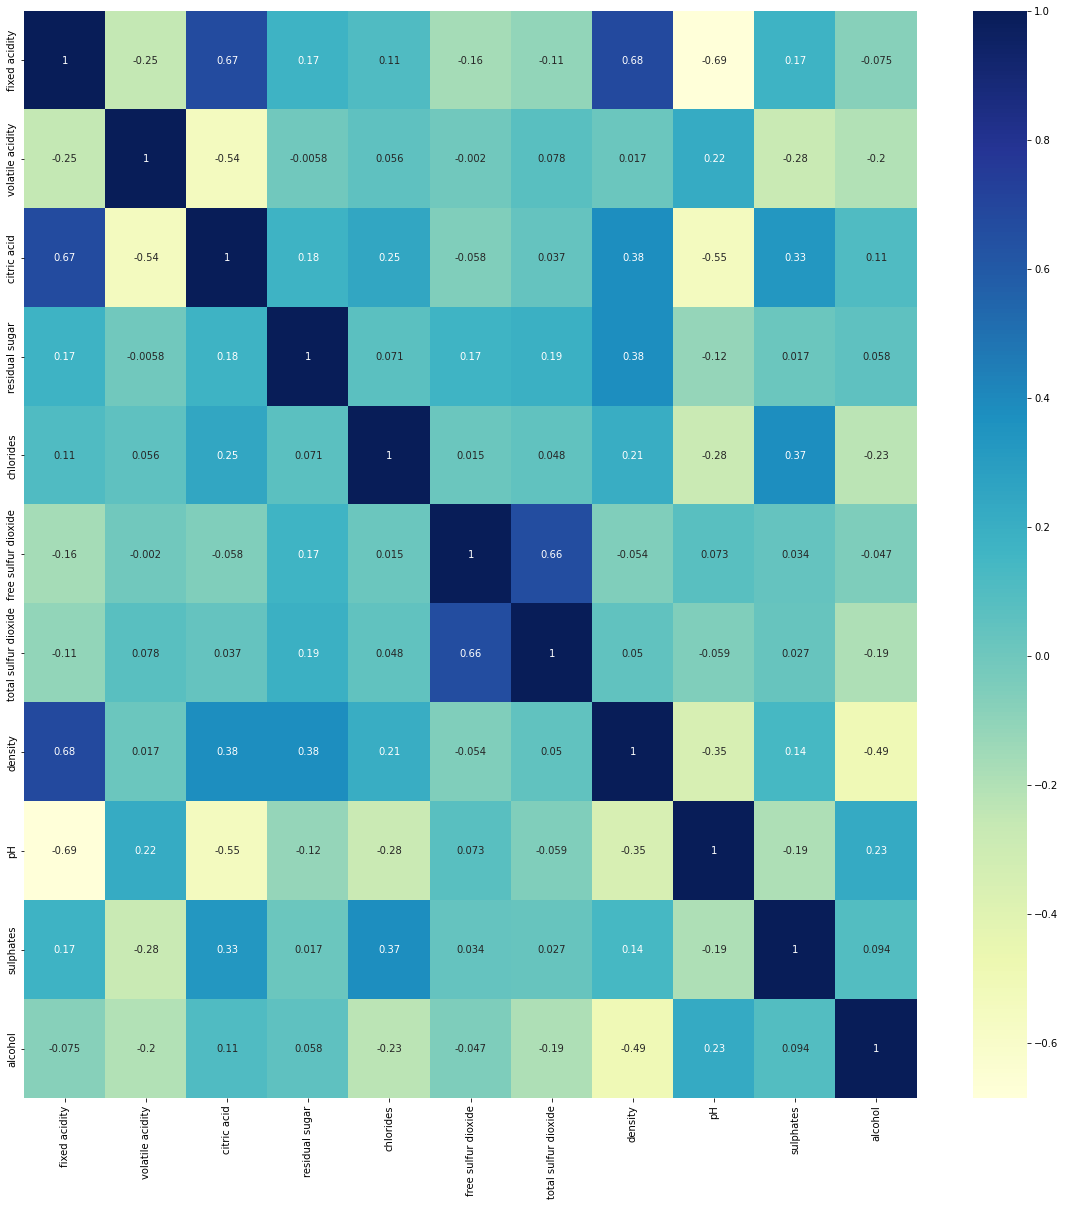

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))
dataplot = sns.heatmap(df_train.drop('quality' , axis = 1).corr(), cmap="YlGnBu", annot=True , ax = ax)
  
# displaying heatmap
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df_train, 0.8)
len(set(corr_features))

0

In [ ]:
df_train.var()

fixed acidity              3.054088
volatile acidity           0.032268
citric acid                0.038685
residual sugar             1.838512
chlorides                  0.002234
free sulfur dioxide      105.072466
total sulfur dioxide    1074.668067
density                    0.000004
pH                         0.024544
sulphates                  0.029036
alcohol                    1.171147
quality                    0.649353
dtype: float64

In [ ]:
df_var = pd.DataFrame(df_train.var())
df_var

,0
fixed acidity,3.054088
volatile acidity,0.032268
citric acid,0.038685
residual sugar,1.838512
chlorides,0.002234
free sulfur dioxide,105.072466
total sulfur dioxide,1074.668067
density,0.000004
pH,0.024544
sulphates,0.029036


In [ ]:
df_var['Index'] = df_var.index
df_var

,0,Index
fixed acidity,3.054088,fixed acidity
volatile acidity,0.032268,volatile acidity
citric acid,0.038685,citric acid
residual sugar,1.838512,residual sugar
chlorides,0.002234,chlorides
free sulfur dioxide,105.072466,free sulfur dioxide
total sulfur dioxide,1074.668067,total sulfur dioxide
density,0.000004,density
pH,0.024544,pH
sulphates,0.029036,sulphates


In [ ]:
df_var.columns = ['Variance' , 'Index']
df_var

,Variance,Index
fixed acidity,3.054088,fixed acidity
volatile acidity,0.032268,volatile acidity
citric acid,0.038685,citric acid
residual sugar,1.838512,residual sugar
chlorides,0.002234,chlorides
free sulfur dioxide,105.072466,free sulfur dioxide
total sulfur dioxide,1074.668067,total sulfur dioxide
density,0.000004,density
pH,0.024544,pH
sulphates,0.029036,sulphates


In [ ]:
df_var[df_var['Variance'] <= 0.01]

,Variance,Index
chlorides,0.002234,chlorides
density,0.000004,density


In [ ]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


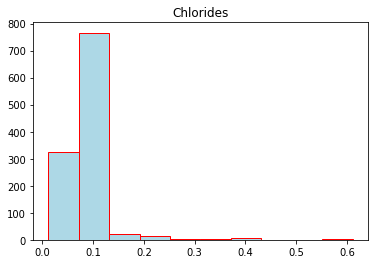

In [ ]:
plt.hist(df_train['chlorides'], color = "lightblue", ec="red");
plt.title('Chlorides');

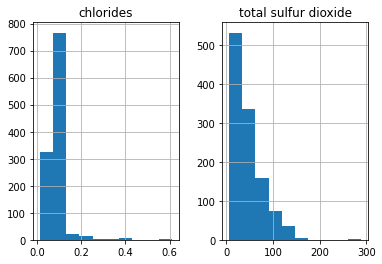

In [ ]:
fig, axes = plt.subplots(1, 2)

df_train.hist('chlorides', ax=axes[0]);
df_train.hist('total sulfur dioxide', ax=axes[1]);

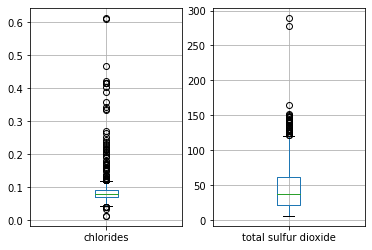

In [ ]:
fig, axes = plt.subplots(1, 2)

df_train.boxplot('chlorides', ax=axes[0]);
df_train.boxplot('total sulfur dioxide', ax=axes[1]);

# Handling outliers

In [ ]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_train_ = df_train.drop('quality' , axis = 1)

In [ ]:
for ele in df_train_.columns:
  q75,q25 = np.percentile(df_train_.loc[:,ele],[75,25])
  intr_qr = q75-q25
  max = q75+(1.5*intr_qr) # above this value will be outlier
  min = q25-(1.5*intr_qr) # below this value will be outlier
  df_train_.loc[df_train_[ele] < min,ele] = np.nan
  df_train_.loc[df_train_[ele] > max,ele] = np.nan

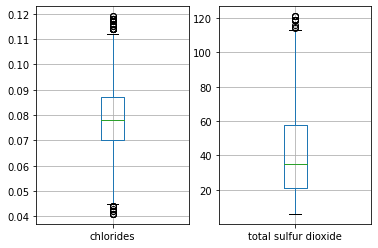

In [ ]:
fig, axes = plt.subplots(1, 2)

df_train_.boxplot('chlorides', ax=axes[0])
df_train_.boxplot('total sulfur dioxide', ax=axes[1])

In [ ]:
df_train_['chlorides'].isna().sum()

77

In [ ]:
num_numerical_col = df_train_.columns

In [ ]:
# function for filling numerical values to NAs for outliers
def fill_na_handler(num_numerical_col , df_train_):
  for ele in df_train_.columns:
    if df_train_[ele].isna().sum() > 0:
      df_train_[ele] = df_train_[ele].fillna(df_train_[ele].mean())
  return df_train_

In [ ]:
df_train_ = fill_na_handler(num_numerical_col , df_train_)

In [ ]:
df_train_.isna().sum().sum()

0

# Building Model

In [ ]:
X = df_train_
y = df_train['quality']

In [ ]:
df_train_.shape

(1143, 11)

In [ ]:
df_train.shape

(1143, 12)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=16)

In [ ]:
y_train.value_counts(normalize = True) * 100

5    42.240373
6    40.373396
7    12.485414
4     2.917153
8     1.400233
3     0.583431
Name: quality, dtype: float64

In [ ]:
y_test.value_counts(normalize = True) * 100

5    42.307692
6    40.559441
7    12.587413
4     2.797203
8     1.398601
3     0.349650
Name: quality, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_train = logr.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.5810968494749125


In [ ]:
# import the metrics class
cnf_matrix_logreg = metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix_logreg

array([[  0,   0,   4,   1,   0,   0],
       [  0,   0,  15,  10,   0,   0],
       [  0,   0, 278,  83,   1,   0],
       [  0,   0, 127, 217,   2,   0],
       [  0,   0,   4, 100,   3,   0],
       [  0,   0,   0,  10,   2,   0]])

In [ ]:
df_train['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Text(0.5, 257.44, 'Predicted label')

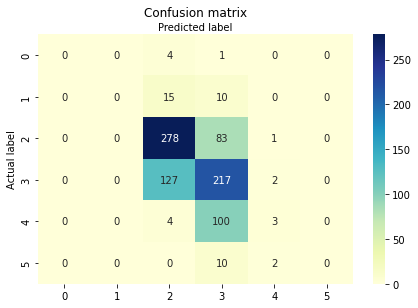

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[5 , 6 , 7 , 4 , 8 , 3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [ ]:
np.arange(len(class_names))

array([0, 1, 2, 3, 4, 5])

In [ ]:
y.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
# target_names = [5 , 6 , 7 , 4 , 8 , 3]
print(classification_report(y_train, y_pred_train));

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.65      0.77      0.70       362
           6       0.52      0.63      0.57       346
           7       0.38      0.03      0.05       107
           8       0.00      0.00      0.00        12

    accuracy                           0.58       857
   macro avg       0.26      0.24      0.22       857
weighted avg       0.53      0.58      0.53       857



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_proba = logr.predict_proba(X_train)[::,1]
len(y_pred_proba)

857

In [ ]:
len(y_train)

857

In [ ]:
y_pred_test = logr.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy: 0.5909090909090909


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_rf_train=clf.predict(X_train)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_rf_train))

cnf_matrix_rf = metrics.confusion_matrix(y_train, y_pred_rf_train)
cnf_matrix_rf

Accuracy: 1.0


array([[  5,   0,   0,   0,   0,   0],
       [  0,  25,   0,   0,   0,   0],
       [  0,   0, 362,   0,   0,   0],
       [  0,   0,   0, 346,   0,   0],
       [  0,   0,   0,   0, 107,   0],
       [  0,   0,   0,   0,   0,  12]])

Text(0.5, 257.44, 'Predicted label')

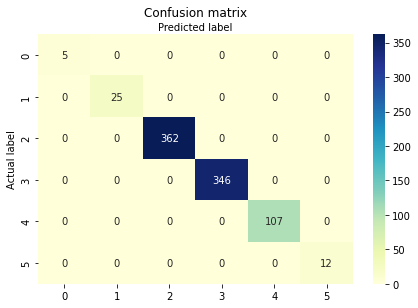

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[5 , 6 , 7 , 4 , 8 , 3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred_rf_test=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_test))

Accuracy: 0.6503496503496503


In [ ]:
cnf_matrix_rf = metrics.confusion_matrix(y_train, y_pred_rf_train)
cnf_matrix_rf

array([[  5,   0,   0,   0,   0,   0],
       [  0,  25,   0,   0,   0,   0],
       [  0,   0, 362,   0,   0,   0],
       [  0,   0,   0, 346,   0,   0],
       [  0,   0,   0,   0, 107,   0],
       [  0,   0,   0,   0,   0,  12]])

## class imbalance using SMOTE

In [ ]:
y.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [ ]:
y_train.value_counts(normalize = True) * 100

5    42.240373
6    40.373396
7    12.485414
4     2.917153
8     1.400233
3     0.583431
Name: quality, dtype: float64

In [ ]:
y_test.value_counts(normalize = True) * 100

5    42.307692
6    40.559441
7    12.587413
4     2.797203
8     1.398601
3     0.349650
Name: quality, dtype: float64

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42 , k_neighbors = 3)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
X_res.shape

(2172, 11)

In [ ]:
X_train.shape

(857, 11)

In [ ]:
y_res.value_counts()

5    362
6    362
4    362
7    362
8    362
3    362
Name: quality, dtype: int64

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

In [ ]:
# logistics reg
logr.fit(X_res,y_res)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_res = logr.predict(X_res)
print("Accuracy:",metrics.accuracy_score(y_res, y_pred_res))

Accuracy: 0.47790055248618785


In [ ]:
# import the metrics class
cnf_matrix_logreg = metrics.confusion_matrix(y_res, y_pred_res)
cnf_matrix_logreg

array([[295,  67,   0,   0,   0,   0],
       [ 90, 128,  60,  52,   0,  32],
       [ 89,  68, 139,  36,  13,  17],
       [ 49,  63,  66,  69,  60,  55],
       [  1,  18,   7,  74, 130, 132],
       [  0,   0,   0,  45,  40, 277]])

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

In [ ]:
# # import the metrics class
# cnf_matrix_sm_lr = metrics.confusion_matrix(y_res, y_pred_res)
# cnf_matrix_sm_lr

array([[295,  67,   0,   0,   0,   0],
       [ 90, 128,  60,  52,   0,  32],
       [ 89,  68, 139,  36,  13,  17],
       [ 49,  63,  66,  69,  60,  55],
       [  1,  18,   7,  74, 130, 132],
       [  0,   0,   0,  45,  40, 277]])

In [ ]:
y_pred_lr_test = logr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr_test))

Accuracy: 0.3041958041958042


In [ ]:
# import the metrics class
cnf_matrix_sm_lr_test = metrics.confusion_matrix(y_test, y_pred_lr_test)
cnf_matrix_sm_lr_test

array([[ 1,  0,  0,  0,  0,  0],
       [ 2,  1,  3,  1,  1,  0],
       [24, 33, 46, 10,  2,  6],
       [16, 18, 21, 27, 18, 16],
       [ 1,  3,  2,  3, 10, 17],
       [ 0,  0,  0,  0,  2,  2]])

In [ ]:
# Random forest
clf.fit(X_res,y_res)

y_pred_rf_res=clf.predict(X_res)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_rf_train))

cnf_matrix_rf = metrics.confusion_matrix(y_train, y_pred_rf_train)
cnf_matrix_rf

Accuracy: 1.0


array([[  5,   0,   0,   0,   0,   0],
       [  0,  25,   0,   0,   0,   0],
       [  0,   0, 362,   0,   0,   0],
       [  0,   0,   0, 346,   0,   0],
       [  0,   0,   0,   0, 107,   0],
       [  0,   0,   0,   0,   0,  12]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_res, y_pred_rf_res))
# import the metrics class
from sklearn import metrics

cnf_matrix_rf = metrics.confusion_matrix(y_res, y_pred_rf_res)
cnf_matrix_rf

Accuracy: 1.0


array([[362,   0,   0,   0,   0,   0],
       [  0, 362,   0,   0,   0,   0],
       [  0,   0, 362,   0,   0,   0],
       [  0,   0,   0, 362,   0,   0],
       [  0,   0,   0,   0, 362,   0],
       [  0,   0,   0,   0,   0, 362]])

In [ ]:
y_pred_rf_test=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_test))
# import the metrics class
from sklearn import metrics

cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf_test)
cnf_matrix_rf

Accuracy: 0.5909090909090909


array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  2,  3,  3,  0,  0],
       [ 0,  3, 84, 34,  0,  0],
       [ 0,  2, 31, 60, 19,  4],
       [ 0,  1,  1,  9, 22,  3],
       [ 0,  0,  0,  0,  3,  1]])

In [ ]:
# XGBclassifier
model_xg.fit(X_res, y_res)
y_pred_xg_res=model_xg.predict(X_res)

In [ ]:
# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_res, y_pred_xg_res))
cnf_matrix_xg_res = metrics.confusion_matrix(y_res, y_pred_xg_res)
cnf_matrix_xg_res

Accuracy: 0.9069981583793738


array([[362,   0,   0,   0,   0,   0],
       [  1, 355,   6,   0,   0,   0],
       [  5,  11, 285,  45,  15,   1],
       [  2,  11,  41, 260,  40,   8],
       [  0,   2,   0,   9, 346,   5],
       [  0,   0,   0,   0,   0, 362]])

In [ ]:
y_pred_xg_test=model_xg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xg_test))
# import the metrics class
from sklearn import metrics

cnf_matrix_xg_test = metrics.confusion_matrix(y_test, y_pred_xg_test)
cnf_matrix_xg_test

Accuracy: 0.5244755244755245


array([[ 1,  0,  0,  0,  0,  0],
       [ 0,  1,  6,  1,  0,  0],
       [ 1, 11, 71, 36,  2,  0],
       [ 0,  5, 27, 55, 21,  8],
       [ 1,  0,  1,  8, 21,  5],
       [ 0,  0,  0,  1,  2,  1]])

In [ ]:
#lgbclassifier

model_lgb.fit(X_res, y_res)
y_pred_lgb_res=model_lgb.predict(X_res)

In [ ]:
# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_res, y_pred_lgb_res))
cnf_matrix_lgb_res = metrics.confusion_matrix(y_res, y_pred_lgb_res)
cnf_matrix_lgb_res

Accuracy: 1.0


array([[362,   0,   0,   0,   0,   0],
       [  0, 362,   0,   0,   0,   0],
       [  0,   0, 362,   0,   0,   0],
       [  0,   0,   0, 362,   0,   0],
       [  0,   0,   0,   0, 362,   0],
       [  0,   0,   0,   0,   0, 362]])

In [ ]:
y_pred_lgb_test=model_lgb.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgb_test))
# import the metrics class
from sklearn import metrics

cnf_matrix_lgb_test = metrics.confusion_matrix(y_test, y_pred_lgb_test)
cnf_matrix_lgb_test

Accuracy: 0.6048951048951049


array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  6,  2,  0,  0],
       [ 0,  2, 85, 33,  1,  0],
       [ 0,  2, 25, 68, 16,  5],
       [ 0,  0,  3, 11, 19,  3],
       [ 0,  0,  0,  1,  2,  1]])

In [ ]:
#adaboost classifier
abc_ada.fit(X_res, y_res)
y_pred_ada_res=abc_ada.predict(X_res)

In [ ]:
# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_res, y_pred_ada_res))
cnf_matrix_ada_res = metrics.confusion_matrix(y_res, y_pred_ada_res)
cnf_matrix_ada_res

Accuracy: 0.35681399631675875


array([[361,   0,   1,   0,   0,   0],
       [235,  59,   9,   1,  58,   0],
       [232,  17,  33,   9,  60,  11],
       [112,  48,  13,  13, 144,  32],
       [ 10,  19,   0,  12, 233,  88],
       [  0,   0,   0,   0, 286,  76]])

In [ ]:
y_pred_ada_test=abc_ada.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada_test))
# import the metrics class
from sklearn import metrics

cnf_matrix_ada_test = metrics.confusion_matrix(y_test, y_pred_ada_test)
cnf_matrix_ada_test

Accuracy: 0.10839160839160839


array([[ 1,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  3,  0],
       [71,  7, 10,  4, 28,  1],
       [36, 17,  9,  4, 36, 14],
       [ 2,  2,  1,  3, 14, 14],
       [ 0,  0,  0,  0,  3,  1]])

# Imbalance data under sampling

In [ ]:
from imblearn.under_sampling import NearMiss
undersampling = NearMiss( version = 1 , n_neighbors= 3)

In [ ]:
from collections import Counter
x_usam , y_usam = undersampling.fit_resample(X_train , y_train)

In [ ]:
x_usam.shape

(30, 11)

In [ ]:
X_train.shape

(857, 11)

In [ ]:
y_usam.value_counts()

3    5
4    5
5    5
6    5
7    5
8    5
Name: quality, dtype: int64

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

In [ ]:
# logistics regression
logr.fit(x_usam,y_usam)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_usam = logr.predict(x_usam)
print("Accuracy:",metrics.accuracy_score(y_usam, y_pred_usam))

Accuracy: 0.6333333333333333


In [ ]:
# import the metrics class
cnf_matrix_logreg_ = metrics.confusion_matrix(y_usam, y_pred_usam)
cnf_matrix_logreg_

array([[2, 0, 2, 0, 1, 0],
       [0, 1, 1, 0, 2, 1],
       [0, 0, 5, 0, 0, 0],
       [0, 1, 0, 3, 1, 0],
       [0, 0, 0, 1, 4, 0],
       [0, 0, 0, 0, 1, 4]])

In [ ]:
y_pred_lr_test_ = logr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr_test_))

Accuracy: 0.03496503496503497


In [ ]:
# import the metrics class
cnf_matrix_sm_lr_test_ = metrics.confusion_matrix(y_test, y_pred_lr_test_)
cnf_matrix_sm_lr_test_

array([[  0,   0,   0,   0,   0,   1],
       [  7,   0,   1,   0,   0,   0],
       [106,   4,   3,   1,   1,   6],
       [ 92,   2,   0,   2,   3,  17],
       [ 22,   0,   0,   3,   4,   7],
       [  2,   0,   0,   1,   0,   1]])

In [ ]:
# Random forest
clf.fit(x_usam,y_usam)

y_pred_rf_usam=clf.predict(x_usam)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_usam, y_pred_rf_usam))

cnf_matrix_rf_1 = metrics.confusion_matrix(y_usam, y_pred_rf_usam)
cnf_matrix_rf_1

Accuracy: 1.0


array([[5, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0],
       [0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 5]])

In [ ]:
y_pred_rf_test_1=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_test_1))
# import the metrics class
from sklearn import metrics

cnf_matrix_rf_2 = metrics.confusion_matrix(y_test, y_pred_rf_test_1)
cnf_matrix_rf_2

Accuracy: 0.10139860139860139


array([[ 1,  0,  0,  0,  0,  0],
       [ 4,  0,  1,  2,  0,  1],
       [71,  4,  9, 15,  1, 21],
       [43,  4,  6, 11,  4, 48],
       [ 2,  1,  1,  3,  6, 23],
       [ 0,  0,  0,  0,  2,  2]])

In [ ]:
# XGB classifier
model_xg.fit(x_usam, y_usam)
y_pred_xg_usam =model_xg.predict(x_usam)

In [ ]:
# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_usam, y_pred_xg_usam))
cnf_matrix_xg_res_3 = metrics.confusion_matrix(y_usam, y_pred_xg_usam)
cnf_matrix_xg_res_3

Accuracy: 1.0


array([[5, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0],
       [0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 5]])

In [ ]:
y_pred_xg_test_4=model_xg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xg_test_4))
# import the metrics class
from sklearn import metrics

cnf_matrix_rf_5 = metrics.confusion_matrix(y_test, y_pred_xg_test_4)
cnf_matrix_rf_5

Accuracy: 0.0944055944055944


array([[ 1,  0,  0,  0,  0,  0],
       [ 4,  0,  2,  2,  0,  0],
       [96,  5,  3, 10,  1,  6],
       [57,  7,  1, 17,  4, 30],
       [ 3,  1,  1,  3,  5, 23],
       [ 0,  0,  0,  0,  3,  1]])

In [ ]:
#lgbclassifier

model_lgb.fit(x_usam, y_usam)
y_pred_lgb_usam=model_lgb.predict(x_usam)

In [ ]:
# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_usam, y_pred_lgb_usam))
cnf_matrix_lgb_usam_4 = metrics.confusion_matrix(y_usam, y_pred_lgb_usam)
cnf_matrix_lgb_usam_4

Accuracy: 0.16666666666666666


array([[5, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0]])

In [ ]:
y_pred_lgb_test_5 = model_lgb.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgb_test_5))
# import the metrics class
from sklearn import metrics

cnf_matrix_lgb_test = metrics.confusion_matrix(y_test, y_pred_lgb_test_5)
cnf_matrix_lgb_test

Accuracy: 0.0034965034965034965


array([[  1,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   0,   0],
       [121,   0,   0,   0,   0,   0],
       [116,   0,   0,   0,   0,   0],
       [ 36,   0,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,   0]])

In [ ]:
#adaboost classifier
abc_ada.fit(x_usam, y_usam)
y_pred_ada_res_4=abc_ada.predict(x_usam)

In [ ]:
# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_usam, y_pred_ada_res_4))
cnf_matrix_ada_usam_5 = metrics.confusion_matrix(y_usam, y_pred_ada_res_4)
cnf_matrix_ada_usam_5

Accuracy: 0.5333333333333333


array([[4, 0, 1, 0, 0, 0],
       [1, 3, 0, 1, 0, 0],
       [1, 0, 4, 0, 0, 0],
       [0, 0, 0, 5, 0, 0],
       [0, 0, 0, 5, 0, 0],
       [0, 0, 0, 5, 0, 0]])

In [ ]:
y_pred_ada_test_5=abc_ada.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada_test_5))
# import the metrics class
from sklearn import metrics

cnf_matrix_ada_test_9 = metrics.confusion_matrix(y_test, y_pred_ada_test_5)
cnf_matrix_ada_test_9

Accuracy: 0.20279720279720279


array([[ 0,  1,  0,  0,  0,  0],
       [ 3,  2,  1,  2,  0,  0],
       [47, 45,  0, 29,  0,  0],
       [19, 41,  0, 56,  0,  0],
       [ 3,  3,  1, 29,  0,  0],
       [ 0,  0,  0,  4,  0,  0]])

# Imbalance data using Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()
x_tl , y_tl = undersample.fit_resample(X_train , y_train)

In [ ]:
x_tl.shape

(707, 11)

In [ ]:
X_train.shape

(857, 11)

In [ ]:
y_tl.value_counts()

5    305
6    282
7     89
4     18
8      8
3      5
Name: quality, dtype: int64

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

# imbalance data using neighbourhood cleaning undersampling

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
undersample = NeighbourhoodCleaningRule(n_neighbors = 3 , threshold_cleaning = 0.5)
x_ncu , y_ncu = undersample.fit_resample(X_train , y_train)

In [ ]:
x_ncu.shape

(414, 11)

In [ ]:
X_train.shape

(857, 11)

In [ ]:
y_ncu.value_counts()

5    222
6    150
7     36
3      5
4      1
Name: quality, dtype: int64

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

# Imbalance data using CondensedNearestNeighbor

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour
undersample = CondensedNearestNeighbour(n_neighbors = 1)
x_cnn , y_cnn = undersample.fit_resample(X_train , y_train)

In [ ]:
x_cnn.shape

(86, 11)

In [ ]:
X_train.shape

(857, 11)

In [ ]:
y_cnn.value_counts()

5    25
6    24
7    15
4    12
3     5
8     5
Name: quality, dtype: int64

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

# Imbalance data using borderline SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
x_bls , y_bls = oversample.fit_resample(X_train , y_train)

In [ ]:
x_bls.shape

(1815, 11)

In [ ]:
X_train.shape

(857, 11)

In [ ]:
y_bls.value_counts()

5    362
6    362
4    362
7    362
8    362
3      5
Name: quality, dtype: int64

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

# Imbalance data using Borderline-SMOTE SVM

In [ ]:
X_train.shape

(857, 11)

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
572,10.8,0.89,0.30,2.600000,0.078704,7.0,60.0,0.99786,2.99,0.635273,10.2
564,10.0,0.56,0.24,2.200000,0.079000,19.0,58.0,0.99910,3.18,0.560000,10.1
778,7.4,0.49,0.27,2.100000,0.071000,14.0,25.0,0.99388,3.35,0.630000,12.0
82,8.3,0.54,0.28,1.900000,0.077000,11.0,40.0,0.99780,3.39,0.610000,10.0
644,9.1,0.28,0.46,2.181849,0.114000,3.0,9.0,0.99901,3.18,0.600000,10.9


In [ ]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE(k_neighbors=4)
x_bsvm , y_bsvm = oversample.fit_resample(X_train , y_train)

ValueError: ignored

# Imbalance data using ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN(n_neighbors = 2, sampling_strategy='minority')
x_bls , y_bls = oversample.fit_resample(X_train , y_train)

In [ ]:
X_train.shape

(857, 11)

In [ ]:
x_bls.shape

(1212, 11)

In [ ]:
y_bls.value_counts()

5    362
3    360
6    346
7    107
4     25
8     12
Name: quality, dtype: int64

In [ ]:
y_train.value_counts()

5    362
6    346
7    107
4     25
8     12
3      5
Name: quality, dtype: int64

# Normal xgbclassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
# make predictions for test data
y_pred_xg_train = model_xg.predict(X_train)
# evaluate predictions
# predictions = [round(value) for value in y_pred_xg]
accuracy = accuracy_score(y_train, y_pred_xg_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.30%


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix_xg = metrics.confusion_matrix(y_train, y_pred_xg_train)
cnf_matrix_xg

array([[  5,   0,   0,   0,   0,   0],
       [  0,  13,   7,   5,   0,   0],
       [  0,   0, 319,  41,   2,   0],
       [  0,   0,  42, 300,   4,   0],
       [  0,   0,   0,  24,  83,   0],
       [  0,   0,   0,   1,   0,  11]])

Text(0.5, 257.44, 'Predicted label')

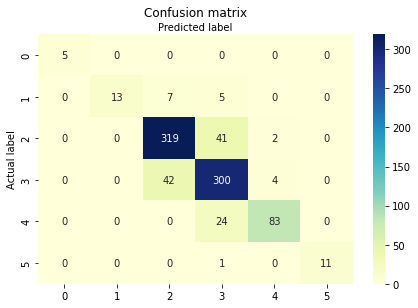

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[5 , 6 , 7 , 4 , 8 , 3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_xg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred_xg_test1=model_xg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xg_test1))
cnf_matrix_xg_test1 = metrics.confusion_matrix(y_test, y_pred_xg_test1)
cnf_matrix_xg_test1

Accuracy: 0.6433566433566433


array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  5,  3,  0,  0],
       [ 0,  1, 89, 31,  0,  0],
       [ 0,  0, 32, 77,  6,  1],
       [ 0,  0,  2, 16, 18,  0],
       [ 0,  0,  0,  1,  3,  0]])

# lightgbm classifier

In [ ]:
import lightgbm as ltb
model_lgb = ltb.LGBMClassifier()
model_lgb.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# make predictions for test data
y_pred_lgb_train = model_lgb.predict(X_train)
# evaluate predictions
# predictions = [round(value) for value in y_pred_xg]
accuracy = accuracy_score(y_train, y_pred_lgb_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix_lgb = metrics.confusion_matrix(y_train, y_pred_lgb_train)
cnf_matrix_lgb

array([[  5,   0,   0,   0,   0,   0],
       [  0,  25,   0,   0,   0,   0],
       [  0,   0, 362,   0,   0,   0],
       [  0,   0,   0, 346,   0,   0],
       [  0,   0,   0,   0, 107,   0],
       [  0,   0,   0,   0,   0,  12]])

In [ ]:
y_pred_lgb_test1=model_lgb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgb_test1))
cnf_matrix_lgb_test1 = metrics.confusion_matrix(y_test, y_pred_lgb_test1)
cnf_matrix_lgb_test1

Accuracy: 0.6223776223776224


array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  5,  3,  0,  0],
       [ 0,  1, 84, 35,  1,  0],
       [ 0,  0, 31, 75,  9,  1],
       [ 0,  0,  1, 16, 19,  0],
       [ 0,  0,  0,  2,  2,  0]])

# adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc_ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
abc_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [ ]:
# make predictions for test data
y_pred_ada_train = abc_ada.predict(X_train)
# evaluate predictions
# predictions = [round(value) for value in y_pred_xg]
accuracy = accuracy_score(y_train, y_pred_ada_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.93%


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix_ada = metrics.confusion_matrix(y_train, y_pred_ada_train)
cnf_matrix_ada

array([[  0,   0,   4,   1,   0,   0],
       [  0,   0,  17,   8,   0,   0],
       [  0,   0, 274,  76,  12,   0],
       [  0,   0, 119, 184,  41,   2],
       [  0,   0,   6,  51,  47,   3],
       [  0,   0,   2,   2,   8,   0]])

In [ ]:
y_pred_ada_test1=abc_ada.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada_test1))
cnf_matrix_ada_test1 = metrics.confusion_matrix(y_test, y_pred_ada_test1)
cnf_matrix_ada_test1

Accuracy: 0.5804195804195804


array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  3,  5,  0,  0],
       [ 0,  0, 88, 32,  1,  0],
       [ 0,  0, 42, 60, 14,  0],
       [ 0,  0,  3, 15, 18,  0],
       [ 0,  0,  1,  1,  2,  0]])

# Randomized Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# build a classifier 
rf_rs = RandomForestClassifier(random_state = 35)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 8)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_rs,

param_distributions = random_grid,
               n_iter = 3, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_res,y_res)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=35),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 25, 41, 57, 72, 88,
                                                      104, 120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [1, 3, 5, 7, 9, 11, 13,
                                                         15, 17, 20]},
                   random_state=35, verbose=2)

In [ ]:
# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 14, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}  



In [ ]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_split=10, n_estimators=15, random_state=35)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
preds_yres_train = rf_random.best_estimator_.predict(X_res)
accuracy = accuracy_score(y_res, preds_yres_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.59%


In [ ]:
preds_ytest_test = rf_random.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, preds_ytest_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.64%


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix_train_rs = metrics.confusion_matrix(y_res, preds_yres_train)
cnf_matrix_train_rs

array([[362,   0,   0,   0,   0,   0],
       [  0, 361,   1,   0,   0,   0],
       [  0,   0, 358,   3,   1,   0],
       [  0,   0,   3, 358,   1,   0],
       [  0,   0,   0,   0, 362,   0],
       [  0,   0,   0,   0,   0, 362]])

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix_test_rs = metrics.confusion_matrix(y_test, preds_ytest_test)
cnf_matrix_test_rs

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  4,  3,  0,  0],
       [ 0,  5, 83, 33,  0,  0],
       [ 0,  6, 33, 54, 18,  5],
       [ 0,  0,  2,  9, 24,  1],
       [ 0,  0,  0,  2,  2,  0]])

In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.5 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC
opt = BayesSearchCV(
     SVC(),
     {
         'C': Real(1e-6, 1e+6, prior='log-uniform'),
         'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
         'degree': Integer(1,8),
         'kernel': Categorical(['linear', 'poly', 'rbf']),
     },
     n_iter=32,
     random_state=0
)

# executes bayesian optimization
_ = opt.fit(X_res, y_res)

# model can be saved, used for predictions or scoring
print(opt.score(X_test, y_test))

# Model stacking

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pip install vecstack


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19879 sha256=6827791b9b9e46ad84b822272f70a92a17a61353735ef9d6772859852cc43bc5
  Stored in directory: /root/.cache/pip/wheels/17/89/0b/21d5484cbf713c95b641ec1bdc40dd7ae798cbdea2337e3535
Successfully built vecstack


In [ ]:
from vecstack import stacking

In [ ]:
models = [KNeighborsClassifier(n_neighbors= 3) ,  
          RandomForestClassifier(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_split=10, n_estimators=15, random_state=35),
        ]
      
S_Train, S_Test = stacking(models,                   
                           X_res, y_res ,X_test ,   
                           regression=False, 
  
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None,  
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [6]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.71823204]
    fold  1:  [0.70165746]
    fold  2:  [0.71270718]
    fold  3:  [0.70902394]
    ----
    MEAN:     [0.71040516] + [0.00602058]
    FULL:     [0.71040516]

model  1:     [RandomForestClassifier]
    fold  0:  [0.85635359]
    fold  1:  [0.84530387]
    fold  2:  [0.83609576]
    fold  3:  [0.86924494]
    ----
    MEAN:     [0.85174954] + [0.01238824]
    FULL:     [0.85174954]



In [ ]:
S_Train

array([[5, 6],
       [5, 6],
       [7, 6],
       ...,
       [8, 8],
       [4, 8],
       [8, 8]])

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()
parameters = {'hidden_layer_sizes':[(10,5,3), (20,7,3)], 'activation':['tanh', 'relu'], 'learning_rate':['constant', 'adaptive'], 'max_iter' :[100, 150]}
mlp_random = RandomizedSearchCV(mlp,parameters,n_iter=15 , scoring = 'accuracy' , cv =5 , verbose = True)
mlp_random.fit(S_Train , y_res)
grid_parm=mlp_random.best_params_
print(grid_parm)
print(mlp_random.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

{'max_iter': 150, 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 5, 3), 'activation': 'tanh'}
0.8351861857089888


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp_random.predict(S_Test)

array([6, 6, 5, 7, 7, 6, 6, 5, 5, 5, 5, 6, 5, 7, 5, 4, 6, 5, 5, 6, 5, 8,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       5, 6, 6, 6, 6, 7, 6, 7, 5, 7, 5, 6, 5, 5, 5, 5, 7, 7, 5, 6, 7, 6,
       5, 8, 6, 5, 5, 5, 5, 5, 4, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 4, 7, 5, 5, 7, 6, 5, 5, 5, 6, 7, 5,
       5, 5, 6, 5, 6, 6, 5, 5, 6, 7, 7, 5, 4, 5, 5, 8, 7, 5, 6, 6, 7, 5,
       7, 6, 7, 7, 6, 6, 5, 5, 5, 6, 6, 5, 6, 7, 5, 5, 6, 7, 5, 5, 5, 6,
       5, 6, 5, 6, 7, 6, 5, 6, 5, 5, 8, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 7, 4, 4, 6, 5, 5, 5, 5, 6, 5, 6, 7, 5, 3, 5, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 8, 7, 8, 7, 6, 5, 5, 5, 7, 5, 5,
       5, 6, 5, 5, 6, 5, 4, 5, 5, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 5, 5, 8,
       5, 8, 5, 4, 5, 5, 7, 6, 8, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6,
       7, 6, 5, 7, 5, 6, 7, 5, 6, 6, 6, 6, 6, 7, 5, 5, 6, 5, 5, 5, 7, 5])

In [ ]:
ytest_test = mlp_random.predict(S_Test)
accuracy = accuracy_score(y_test, ytest_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.09%


In [ ]:
cnf_matrix_test_rs = metrics.confusion_matrix(y_test, ytest_test)
cnf_matrix_test_rs

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  3,  3,  2,  0,  0],
       [ 1,  2, 94, 24,  0,  0],
       [ 0,  2, 43, 52, 15,  4],
       [ 0,  1,  2, 10, 19,  4],
       [ 0,  0,  0,  0,  3,  1]])

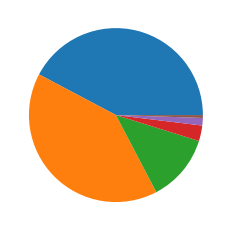

In [ ]:
plt.pie(df_train['quality'].value_counts());